# Auto Price Linear Regression Model.

In [325]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import math
import warnings


warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [326]:
pd.set_option('display.max_columns', 50)

In [327]:
auto_df = pd.read_csv('Automobile price data _Raw_.csv')

In [328]:
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [329]:
auto_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [330]:
auto_df.columns = [str.replace('-', '_') for str in auto_df.columns]

In [331]:
auto_df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [332]:
auto_df.shape

(205, 26)

A lot of values in the auto_df dataframe contains '?' in the place of missing values. 
So, we need to convert it to nan for any further processing.

In [333]:
#auto_df = auto_df.replace(r'[?],np.nan,regex = True)
auto_df.replace('?', np.nan , inplace = True)

Percentage of missing values across each column in the dataframe.

In [334]:
np.round((auto_df.isna().sum().sort_values(ascending = False)/len(auto_df))*100,2)

normalized_losses    20.00
price                 1.95
stroke                1.95
bore                  1.95
peak_rpm              0.98
horsepower            0.98
num_of_doors          0.98
length                0.00
make                  0.00
fuel_type             0.00
aspiration            0.00
body_style            0.00
drive_wheels          0.00
engine_location       0.00
wheel_base            0.00
height                0.00
width                 0.00
highway_mpg           0.00
curb_weight           0.00
engine_type           0.00
num_of_cylinders      0.00
engine_size           0.00
fuel_system           0.00
compression_ratio     0.00
city_mpg              0.00
symboling             0.00
dtype: float64

In [335]:
auto_df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

Drop the records where we have the missing values.

In [336]:
auto_df.dropna(axis = 0, inplace = True)

The following columns are actually numeric but due to the presence of '?' in the place of missing values, the data type of these columns got changed to an object data type.

In [338]:
cols = ['price', 'bore', 'stroke', 'horsepower', 'peak_rpm']

In [339]:
auto_df['price'][:5]

3     13950
4     17450
6     17710
8     23875
10    16430
Name: price, dtype: object

In [340]:
auto_df['bore'][:5]

3     3.19
4     3.19
6     3.19
8     3.13
10    3.50
Name: bore, dtype: object

In [341]:
auto_df['stroke'][:5]

3     3.40
4     3.40
6     3.40
8     3.40
10    2.80
Name: stroke, dtype: object

In [342]:
auto_df['horsepower'][:5]

3     102
4     115
6     110
8     140
10    101
Name: horsepower, dtype: object

In [343]:
auto_df['peak_rpm'][:5]

3     5500
4     5500
6     5500
8     5500
10    5800
Name: peak_rpm, dtype: object

In [344]:
for column in cols:
        auto_df[column] = pd.to_numeric(auto_df[column])

Create a copy of the cleaned version of the dataframe and save it as claen_auto_df.

In [345]:
clean_auto_df = auto_df

In [346]:
clean_auto_df.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,3.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


Plots to show the distribution of autos by different features.

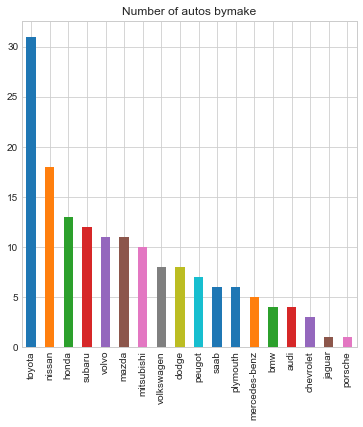

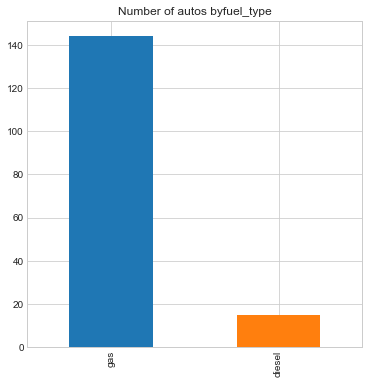

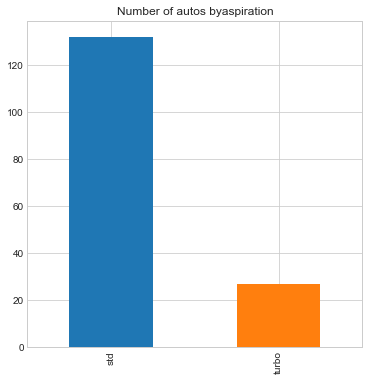

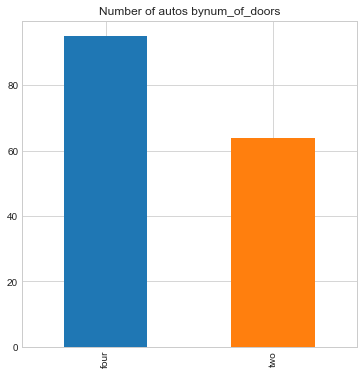

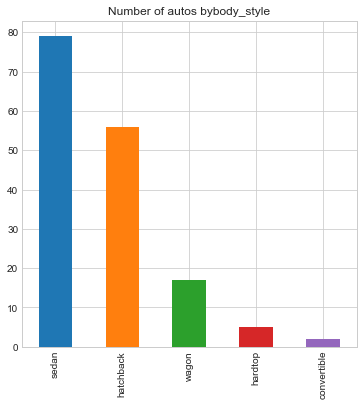

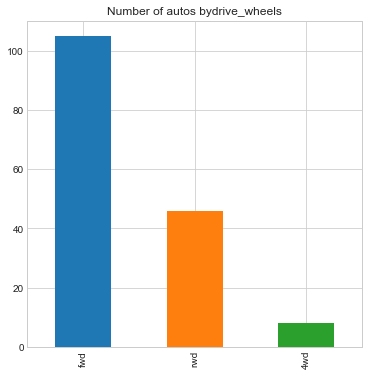

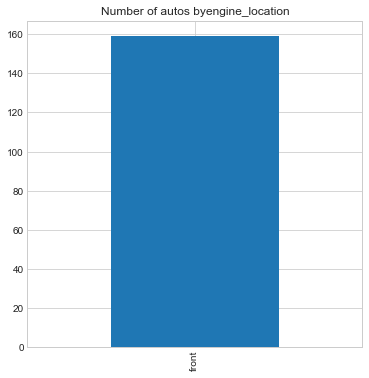

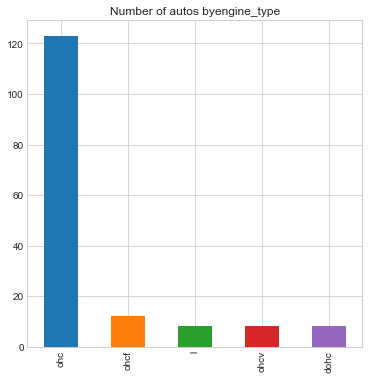

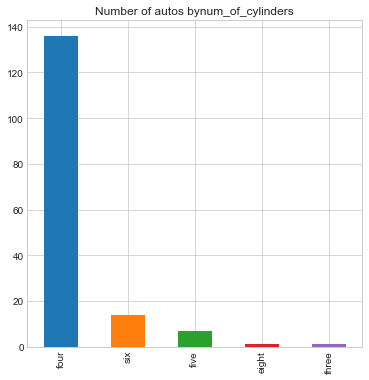

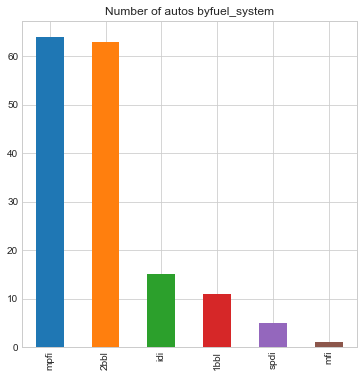

In [347]:
def count_unique_bar(auto_prices, cols):
    for col in cols:
        #print('\n' + 'For column ' + col)
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()
        ax.set_title('Number of autos by' + col)
        clean_auto_df[col].value_counts().plot(kind='bar')
        plt.show()
        #print(clean_auto_df[col].value_counts())

cat_cols = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
            'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 
            'fuel_system']
count_unique_bar(clean_auto_df, cat_cols)

In [348]:
clean_auto_df.shape

(159, 26)

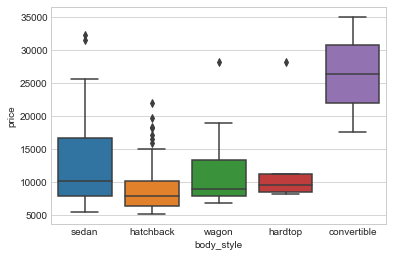

In [349]:
def plot_box(clean_auto_df, col, col_y = 'price'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=clean_auto_df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(clean_auto_df, 'body_style')    

In [350]:
clean_auto_df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


In [351]:
clean_auto_df.shape

(159, 26)

The distribution of auto price is somewhat skewd to the left.

C:\Users\Khyati\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


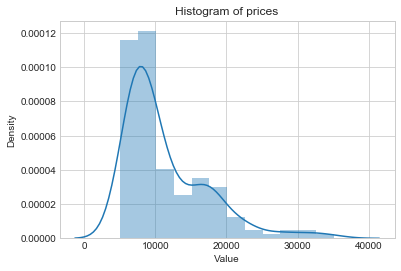

In [362]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(clean_auto_df['price'], 'prices')

The distribution of autos by its logarithmic price is symmetric and is therefore an improvement over auto price in general.
Thus, we will use the logarithmic price of autos as the labels.

C:\Users\Khyati\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


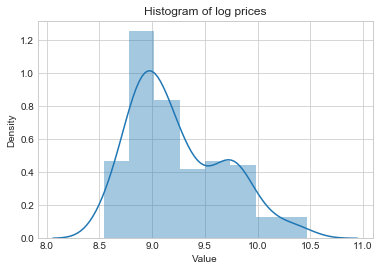

In [353]:
clean_auto_df['log_price'] = np.log(clean_auto_df['price'])
hist_plot(clean_auto_df['log_price'], 'log prices')

Convert the categorical values to numerical values for the model to be trained.

In [354]:
def encode_string(cat_feature):
    #encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    #apply one-hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['body_style','fuel_type', 'aspiration', 'drive_wheels', 'num_of_cylinders']

for col in categorical_columns:
    temp = encode_string(clean_auto_df[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])    

(159, 65)
[[0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 2.337e+03 1.020e+02
  2.400e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  1.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00 0.000e+00 2.337e+03 1.020e+02 2.400e+01
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00
  1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 0.000e+00 0.000e+00 2.337e+03 1.020e+02 2.400e+01 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 2.824e+03 1.150e+02
  1.800e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  1.000e+00 1.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 0.000e+00 0.000e+00 0.000e+00 2.824e+03 1.150e+02 1.800e+01
  0.000e+00 0.000e+00 0.000e+00

Concatenate the categorical values that are converted to the numerical values already present in the dataframe to the features.

In [355]:
Features = np.concatenate([Features, np.array(clean_auto_df[['curb_weight', 'horsepower', 'city_mpg']])], axis = 1)

In [356]:
labels = np.array(clean_auto_df['log_price'])
labels

array([ 9.54323479,  9.76709493,  9.78188473, 10.08058717,  9.70686421,
        9.7365471 ,  9.95084812,  9.95726526,  8.54694615,  8.74751095,
        8.79102986,  8.62550933,  8.76045305,  8.98180732,  8.73697109,
        8.80866806,  8.93708704,  9.09616333,  9.46993156,  8.77632146,
        8.83273359,  8.59396903,  8.78400907,  8.87192625,  8.89494446,
        8.89494446,  8.97398493,  9.11548009,  9.08760761,  9.23941362,
        9.46846489,  9.24425859, 10.38127332,  8.5554519 ,  8.71522404,
        8.82394233,  8.80911626,  8.90855938,  9.08760761,  9.04723303,
        9.26813747,  9.23454506,  9.32767886,  9.81356285, 10.14847087,
       10.24877794, 10.24622583, 10.3609124 , 10.46470206,  8.59211512,
        8.7305288 ,  8.8052252 ,  8.94754602,  9.20623194,  9.04770379,
        8.85209276,  9.01054707,  9.13550906,  9.13550906,  8.61232154,
        8.86770921,  8.80222175,  8.83185794,  8.90231953,  8.89549263,
        8.9617508 ,  8.92252496,  8.98707181,  9.01784726,  9.09

Split the dataset into train and test datasets.

In [357]:
X_train, X_test, y_train, y_test = ms.train_test_split(Features, labels, test_size=0.4, random_state=9988)

The numeric feautures are all scaled so that they are in the similar range of values.

In [358]:

scaler = preprocessing.StandardScaler().fit(X_train[:,14:])
X_train[:,14:] = scaler.transform(X_train[:,14:])
X_test[:,14:] = scaler.transform(X_test[:,14:])
print(X_train.shape)
X_train[:2,:]

(95, 68)


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  2.69500000e+03,
         1.10000000e+02,  2.10000000e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  3.61873432e-01,
         4.66849781e-01, -4.66849781e-01, -2.35702260e-01,
         7.46576888e-01, -6.62867965e-01, -1.03142125e-01,
        -1.80578780e-01,  3.61873432e-01, -2.82038037e-01,
         0.00000000e+00,  5.30744486e-01,  5.40132606e-01,
        -9.68222265e-01, -1.03142125e-01, -1.46647115e-01,
        -7.63762616e-01,  1.05409255e+00, -3.80234550e-01,
        -3.61873432e-01,  3.61873432e-01,  4.66849781e-01,
        -4.66849781e-01, -2.35702260e-01,  7.46576888e-01,
        -6.62867965e-01, -1.03142125e-01, -1.80578780e-01,
         3.61873432e-01, -2.82038037e-01,  0.00000000e+00,
         5.30744486e-01,  5.40132606e-01, -9.68222265e-01,
        -1.03142125e-01, -1.46647115e-01, -7.63762616e-0

The model is trained using a linear regression model.

In [359]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [360]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 1.07347389e+08 -1.76296888e+10  3.21526419e+08 -9.58356312e+08
  6.24934768e+08 -7.77317685e+04  3.12263967e+06  2.08020845e+07
  2.41983067e+06  1.66122200e+08 -1.18023609e+08  2.80403498e+07
 -7.53698286e+07  1.73723544e+06  2.36713567e+06  3.79085541e-03
 -3.78990173e-03  4.47030118e+05  9.59698692e+05  9.21937554e+05
 -1.73667742e+07  2.57347778e+06  4.70870915e+06  3.84464490e+06
  0.00000000e+00  1.20758464e+07 -3.24155498e+07 -4.30450324e+07
 -1.73667742e+07  1.19716993e+09 -2.38468895e+08  3.62230674e+07
 -2.21711495e+08  4.52817128e+05 -4.52817128e+05  3.78990173e-03
 -3.78990173e-03  4.47030118e+05  9.59698692e+05  9.21937554e+05
 -1.73667742e+07  2.57347778e+06  4.70870915e+06  3.84464490e+06
  0.00000000e+00  1.20758464e+07 -3.24155498e+07 -4.30450324e+07
 -1.73667742e+07  1.19716993e+09 -2.38468895e+08  3.62230674e+07
 -2.21711495e+08  4.52817128e+05 -4.52817128e+05  3.78990173e-03
 -3.78990173e-03  4.47030118e+05  9.59698692e+05  9.21937554e+05
 -1.73667742e+07  2.5

Evaluate the model.

In [361]:
y_predicted = lin_mod.predict(X_test) 
print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_test, y_predicted)))
print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_predicted))))
print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_test, y_predicted)))
print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_test, y_predicted)))

Mean Square Error      = 4837329339280438.0
Root Mean Square Error = 69550911.8508193
Mean Absolute Error    = 9356266.474016888
Median Absolute Error  = 0.1106291787442455
